Customer Profile Generation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
user_transaction_clusters = pd.read_csv('data/user_transaction_clusters_v1.csv')

In [34]:
transaction = pd.read_csv('data/transaction_processed.csv')

In [3]:
user_transaction_clusters.head(1)

,id,current_age,retirement_age,birth_year,birth_month,address,latitude,longitude,per_capita_income,yearly_income,...,client_id,amount,merchant_id,merchant_category,month,hour,use_chip_Chip Transaction,use_chip_Online Transaction,use_chip_Swipe Transaction,cluster
0,825,53,66,1966,11,462 Rose Lane,34.15,-117.76,29278.0,59696.0,...,825,178.32,60569,Wholesale Clubs,1,6,0,0,1,1


In [4]:
amount_per_cluster = user_transaction_clusters.groupby(['cluster'])['amount'].sum().reset_index()

In [5]:
amount_per_cluster.head()

,cluster,amount
0,0,29996226.62
1,1,20769687.56
2,2,3271321.73


In [6]:
income_expense = user_transaction_clusters.groupby(['client_id'], as_index=False).agg({'amount': 'sum', 'yearly_income': 'first', 'cluster': 'first'})

In [7]:
income_expense.head(1)

,client_id,amount,yearly_income,cluster
0,0,56962.09,59613.0,0


c:\Users\Gunisha Chaturvedi\.conda\envs\myvenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  This is separate from the ipykernel package so we can avoid doing imports until


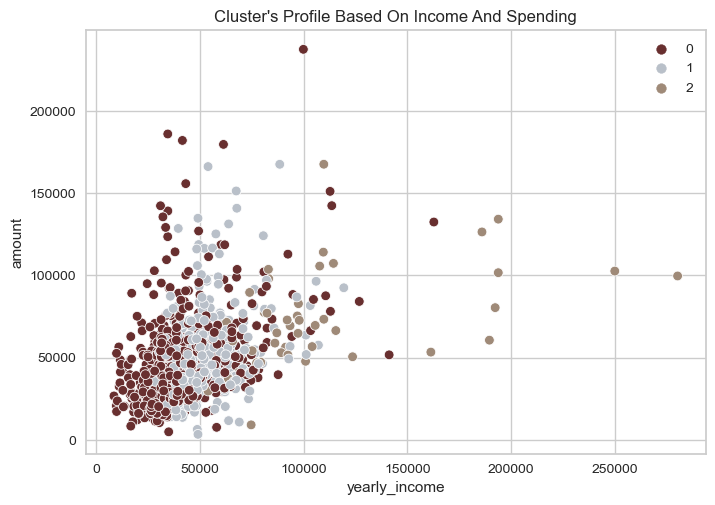

In [8]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

pl = sns.scatterplot(data = income_expense, x = income_expense["yearly_income"], y = income_expense["amount"], hue = income_expense["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
#customer 123 is a 25 year old female who lives in abc area. compare per capita income to customer's income. #get amount spent on top merchants, and get top months within that purchase, get their age and mode of transaction. box plot of sum amount and merchant. 

In [ ]:
#amount_spend = transaction.groupby(['client_id','merchant_category'])['amount'].sum().reset_index()

In [9]:
insights = user_transaction_clusters.groupby(['merchant_category','month','cluster'], as_index=False).agg({'amount': 'sum', 'current_age': 'mean'})

In [10]:
insights.head(10)

,merchant_category,month,cluster,amount,current_age
0,"Accounting, Auditing, and Bookkeeping Services",1,0,1220.22,51.500000
1,"Accounting, Auditing, and Bookkeeping Services",1,1,3037.16,48.230769
2,"Accounting, Auditing, and Bookkeeping Services",1,2,614.56,44.500000
3,"Accounting, Auditing, and Bookkeeping Services",2,0,2115.77,59.230769
4,"Accounting, Auditing, and Bookkeeping Services",2,1,2744.15,51.153846
5,"Accounting, Auditing, and Bookkeeping Services",2,2,529.66,35.000000
6,"Accounting, Auditing, and Bookkeeping Services",3,0,2366.59,62.437500
7,"Accounting, Auditing, and Bookkeeping Services",3,1,3183.33,51.666667
8,"Accounting, Auditing, and Bookkeeping Services",3,2,226.88,53.000000
9,"Accounting, Auditing, and Bookkeeping Services",4,0,1910.77,62.076923


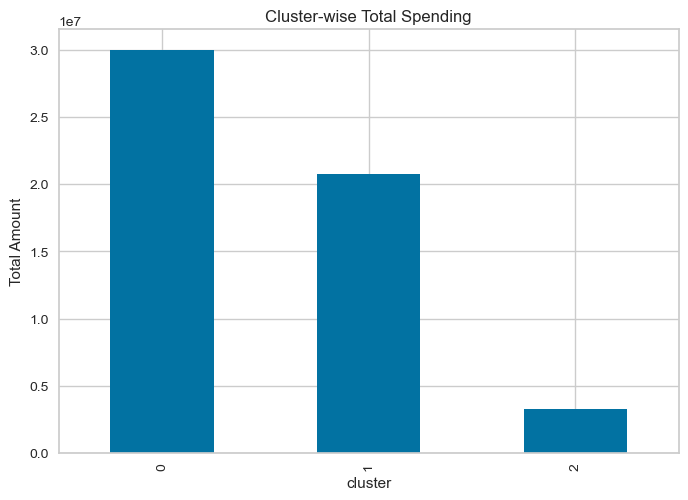

In [12]:
insights.groupby("cluster")["amount"].sum().plot(kind="bar", title="Cluster-wise Total Spending")
plt.ylabel("Total Amount")
plt.show()

c:\Users\Gunisha Chaturvedi\.conda\envs\myvenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  This is separate from the ipykernel package so we can avoid doing imports until


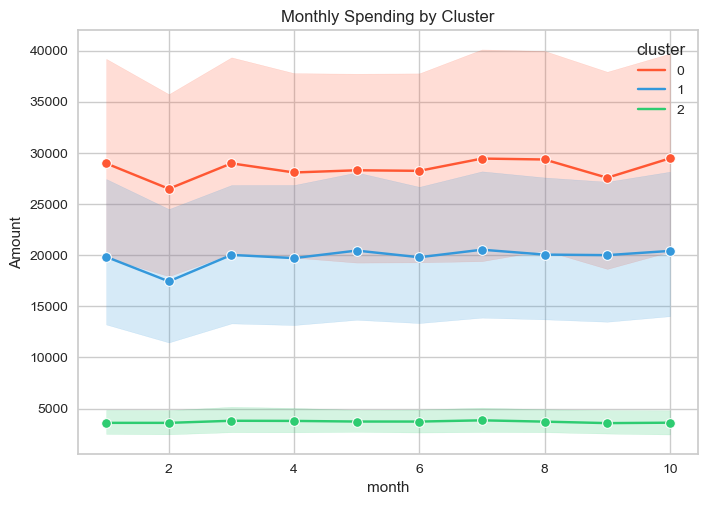

In [13]:
custom_palette = ["#FF5733", "#3498DB", "#2ECC71", "#F39C12"]

sns.lineplot(data = insights, x="month", y="amount", hue="cluster", marker="o", palette=custom_palette)
plt.title("Monthly Spending by Cluster")
plt.ylabel("Amount")
plt.show()

In [14]:
top_10_merchants = insights.groupby('merchant_category')['amount'].sum().reset_index().sort_values(by = 'amount', ascending=False)['merchant_category'][0:10]

In [15]:
top_10_merchants

70                                 Money Transfer
87                               Service Stations
45                   Grocery Stores, Supermarkets
106                               Wholesale Clubs
64                      Miscellaneous Food Stores
33                     Drug Stores and Pharmacies
104    Utilities - Electric, Gas, Water, Sanitary
26                              Department Stores
34                  Eating Places and Restaurants
99                          Tolls and Bridge Fees
Name: merchant_category, dtype: object

In [16]:
insights_top_merchants = insights[insights['merchant_category'].isin(top_10_merchants)]

In [17]:
insights_top_merchants.head(2)

,merchant_category,month,cluster,amount,current_age
693,Department Stores,1,0,129088.62,57.217283
694,Department Stores,1,1,88799.38,47.588693


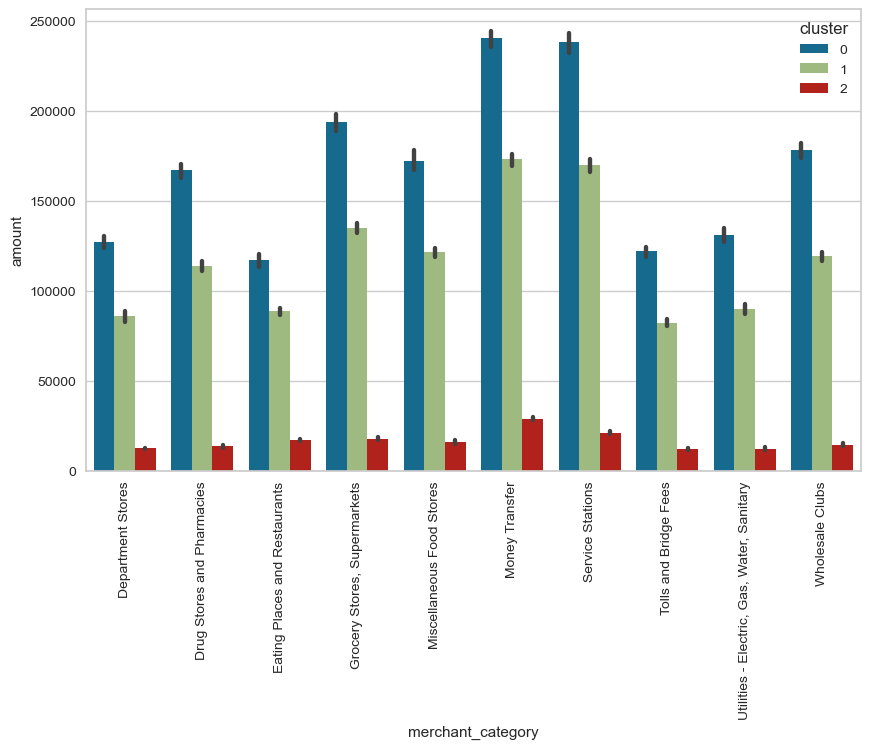

In [18]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='merchant_category', y='amount', hue='cluster', data=insights_top_merchants)
plt.xticks(rotation=90)
plt.show()
#0 spends most on grocery and wholesale, 1 on grocery and wholesale clubs, 2 grocery and wholesale, 3 same as 2

c:\Users\Gunisha Chaturvedi\.conda\envs\myvenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  


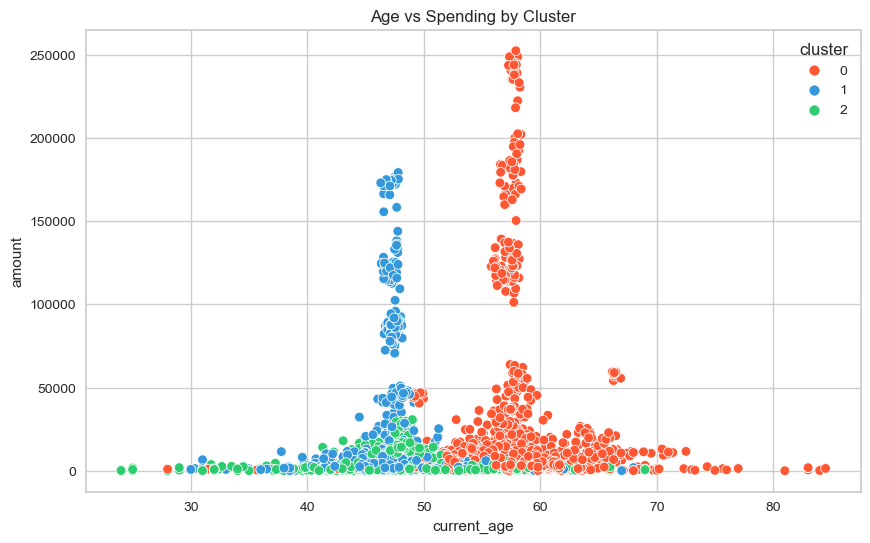

In [19]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data = insights, x = "current_age", y = "amount", hue = "cluster", palette=custom_palette)
plt.title("Age vs Spending by Cluster")
plt.show()

In [20]:
#get the sum of 'amount' column grouped by 'cluster' column and plot it against 'age' column

grouped_data = insights.groupby("cluster").agg(
    {"amount": "sum", "current_age": "mean"} 
).reset_index()

grouped_data

,cluster,amount,current_age
0,0,29996226.62,58.015431
1,1,20769687.56,47.713587
2,2,3271321.73,48.162998


c:\Users\Gunisha Chaturvedi\.conda\envs\myvenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  """Entry point for launching an IPython kernel.


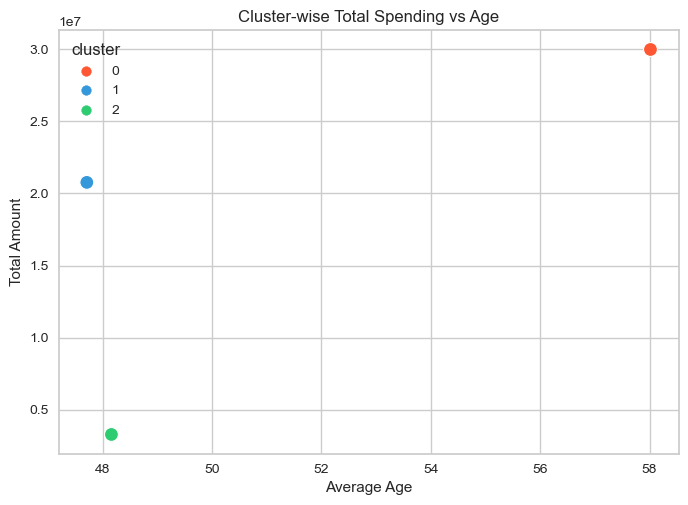

In [21]:
sns.scatterplot(data = grouped_data, x = "current_age", y = "amount", hue = "cluster", s = 100, palette=custom_palette)
plt.title("Cluster-wise Total Spending vs Age")
plt.xlabel("Average Age")
plt.ylabel("Total Amount")
plt.show()

In [77]:
def get_cluster_profile(cluster):

    cluster_desc = ""
    
    if cluster == 0:
        cluster_desc = '''Customer belongs to the highest spending group. This group on an average has yearly income and expenses both < $50K. 
        The sectors where the customer majorly spends are Money Transfer, Service Station, and Grocery (mostly basic needs). 
        The monthly distribution of expenses is almost constant, it goes down in Feb and up in July-Aug.'''
    
    elif cluster == 1:
        cluster_desc = '''This group of customers, on an average have yearly income in the range $50-60K but tend to spend more than that yearly. 
        The sectors where the customer majorly spends are Money Transfer, Service Station, and Grocery (mostly basic needs).
        The monthly distribution of expenses is almost constant, it goes down in Feb and up in July-Aug.'''
    
    else:
        cluster_desc = '''These customers have higher yearly income compared to other 2 groups, but the expenses are not more than $100K.
        The customer spends almost equal amounts on all sectors. The monthly distribution of expenses is almost constant.'''

    return cluster_desc


def get_customer_profile(cust_id, transaction):
    
    cust_id = int(cust_id)
    
    amount_spend = transaction.groupby(['client_id','merchant_category'])['amount'].sum().reset_index()
    top_merchant = amount_spend.loc[amount_spend.groupby('client_id')['amount'].idxmax(), ['client_id', 'merchant_category', 'amount']]
    
    
    merc = top_merchant[top_merchant['client_id'] == cust_id]['merchant_category'].values[0]
    merc_amount = top_merchant[top_merchant['client_id'] == cust_id]['amount'].values[0]

    
    cluster = user_transaction_clusters[user_transaction_clusters['client_id'] == cust_id]['cluster'].iloc[0]
    cluster_prof = get_cluster_profile(cluster)

    cust_details = user_transaction_clusters[user_transaction_clusters['client_id'] == cust_id].iloc[0]
    
    
    if cust_details['gender_Female'] == 1:
        gender = 'female'
    else:
        gender = 'male'
    
    
    cust_prof = f'''The customer is a {cust_details['current_age']} year old {gender}, and here are few key points about this customer:
     1. Has an yearly income of {cust_details['yearly_income']}. 
     2. Spends {merc_amount} yearly on {merc}, which is the maximum of all sectors.
     3. Has a credit score of {cust_details['credit_score']} with total {cust_details['num_credit_cards']} credit cards. 
     4. {cluster_prof}'''


    prompt = f'''Generate a personalized marketing email for a {cust_details['current_age']} year old {gender} customer whose retirement age is {cust_details['retirement_age']}. 
    Their credit score is {cust_details['credit_score']}, yearly income is ${cust_details['yearly_income']} and they tend to spend more on {merc}. 
    For example- they spent ${merc_amount} in the past year on {merc}.
    Mention suitable offers for someone with {cust_details['num_credit_cards']} credit cards.'''


    return cust_prof, prompt

In [101]:
cust_id = input('Enter Customer ID')

cust_prof, prompt = get_customer_profile(cust_id, transaction)

print(cust_prof)

print('Prompt:',prompt)

The customer is a 54 year old female, and here are few key points about this customer:
     1. Has an yearly income of 58248.0. 
     2. Spends 31700.0 yearly on Money Transfer, which is the maximum of all sectors.
     3. Has a credit score of 728 with total 4 credit cards. 
     4. This group of customers, on an average have yearly income in the range $50-60K but tend to spend more than that yearly. 
        The sectors where the customer majorly spends are Money Transfer, Service Station, and Grocery (mostly basic needs).
        The monthly distribution of expenses is almost constant, it goes down in Feb and up in July-Aug.
Prompt: Generate a personalized marketing email for a 54 year old female customer whose retirement age is 66. 
    Their credit score is 728, yearly income is $58248.0 and they tend to spend more on Money Transfer. 
    For example- they spent $31700.0 in the past year on Money Transfer.
    Mention suitable offers for someone with 4 credit cards.


Marketing e-mail

In [102]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

completion = client.chat.completions.create(
  model="meta-llama/llama-3-8b-instruct:free",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ],
  temperature = 0.4,
  max_tokens = 300,
  n = 2
)
print(completion.choices[0].message.content)

Subject: Exclusive Offers for a Savvy Retiree like You!

Dear [Name],

As you're approaching the final stretch towards your retirement goal of 66, we're excited to recognize your financial savvy and long-term planning. With a credit score of 728 and a steady income of $58,248.00, you're well-prepared for the next chapter of your life.

We've taken note of your spending habits, and we're impressed by your significant investment in money transfer services, totalling $31,700.00 in the past year. You're clearly a forward-thinker, and we'd like to help you make the most of your hard-earned savings.

As a valued customer with 4 credit cards, we're excited to offer you some exclusive deals tailored to your needs:

1. **Credit Card Rewards Boost**: For a limited time, enjoy a 5% cashback bonus on all your credit card transactions, up to $500. This is on top of your existing rewards program, giving you an even greater return on your spending.
2. **Money Transfer Discount**: As a loyal customer,